In [6]:
import numpy as np

class Body:

    def __init__(self, mass, position, velocity):
        self.mass = mass # mass of body [kg]
        self.position = np.array(position) # position of body [m]
        self.velocity = np.array(velocity) # velocity of body [m/s]

# initialize bodies with random masses, positions, and velocities over set range
# num_bodies [scalar], mass_range [low, high], position_range [low, high], velocity_range [low, high]
def initialize_bodies(num_bodies, mass_range, position_range, velocity_range):

    masses = np.random.uniform(mass_range[0], mass_range[1], num_bodies)
    positions = np.random.uniform(position_range[0], position_range[1], (num_bodies, 2))
    velocities = np.random.uniform(velocity_range[0], velocity_range[1], (num_bodies, 2))

    # returning list of bodies
    return [Body(masses[i], positions[i], velocities[i]) for i in range(num_bodies)]

class NBodySimulation:

    # bodies = list of bodies involved in simulation
    def __init__(self, bodies):
        self.constants()
        self.bodies = bodies

    def constants(self):
        self.G = 6.67430e-11 # gravitational constant [N*m^2/kg^2]
        self.c = 3e8 # speed of light [m/s]

    # run simulation


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [16]:
# initialize bodies with random masses, positions, and velocities over set range
# bodies[n] = Body(mass, position [x, y], velocity [vx, vy])
bodies = initialize_bodies(5, mass_range = [1, 10], position_range = [-25, 25], velocity_range = [-5, 5])

# printing sample values
print(bodies[0].mass)
print(bodies[0].position)
print(bodies[0].velocity)
print(len(bodies))

3.138243883139888
[-16.28670162 -10.02985424]
[ 4.56882858 -1.53752822]
5


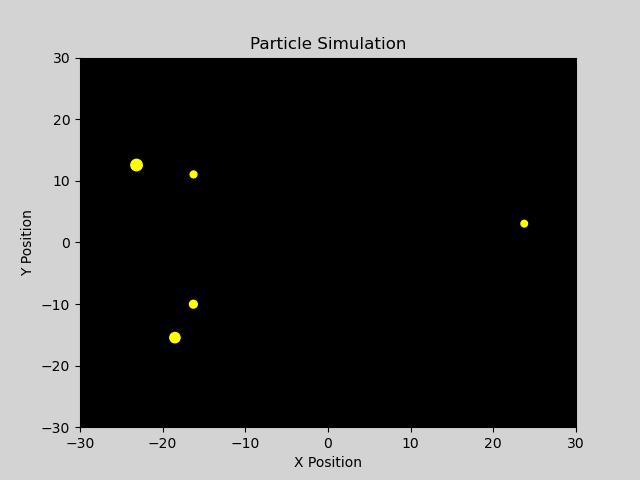

In [17]:
# Example animation using matplotlib

%matplotlib widget

# Time step for position updates
dt = 0.1

# Set up the plot
fig, ax = plt.subplots()
ax.set_xlim(-30, 30) # X-axis limits
ax.set_ylim(-30, 30) # Y-axis limits
ax.set_title("Particle Simulation", color="black")  # Title
ax.set_xlabel("X Position", color="black")  # X-axis label
ax.set_ylabel("Y Position", color="black")  # Y-axis label
ax.tick_params(axis='x', colors="black")  # X-axis ticks
ax.tick_params(axis='y', colors="black")  # Y-axis ticks
ax.set_facecolor("black")  # Set background color
fig.patch.set_facecolor("lightgray")  # Outside the plot

# Create scatter plot with initial positions
scat = ax.scatter(
    [body.position[0] for body in bodies], # Initial x-coordinate of bodies
    [body.position[1] for body in bodies], # Initial y-coordinate of bodies
    s=[body.mass * 10 for body in bodies], # Size of bodies proportional to mass
    c="yellow",  # Color of bodies
)

# Update function for animation
def update_position(frame):

    updated_positions = [] # Initialize as a list

    for body in bodies:
        body.position += body.velocity * dt  # Update positions
        updated_positions.append(body.position)  # Collect new positions
    scat.set_offsets(updated_positions)  # Update scatter plot
    
    return scat

# Create the animation
ani = animation.FuncAnimation(
    fig=fig,
    func=update_position,
    frames=range(50),  # Number of frames
    interval=50,  # Time between frames in milliseconds
    repeat=False,  # Stop after the last frame
)

# Show the plot
plt.show()

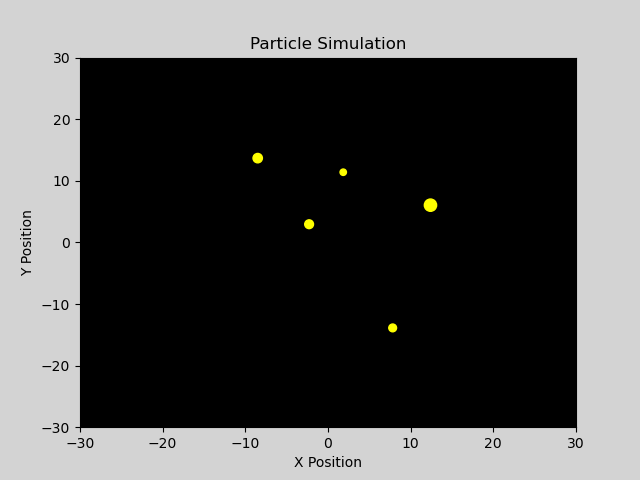

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Class for defining the body
class Body:
    def __init__(self, mass, position, velocity):
        self.mass = mass  # Mass of body [kg]
        self.position = np.array(position)  # Position of body [m]
        self.velocity = np.array(velocity)  # Velocity of body [m/s]
        self.radius = np.cbrt(self.mass / (4/3 * np.pi)) * 1e2  # Estimate radius from mass

# Initialize bodies with random properties
def initialize_bodies(num_bodies, mass_range, position_range, velocity_range):
    masses = np.random.uniform(mass_range[0], mass_range[1], num_bodies)
    positions = np.random.uniform(position_range[0], position_range[1], (num_bodies, 2))
    velocities = np.random.uniform(velocity_range[0], velocity_range[1], (num_bodies, 2))

    return [Body(masses[i], positions[i], velocities[i]) for i in range(num_bodies)]

# Collision detection and response (elastic)
def resolve_collision(body1, body2):
    # Calculate the vector between the two bodies
    r12 = body2.position - body1.position
    distance = np.linalg.norm(r12)
    
    # If bodies are close enough (based on their radii), they collide
    if distance < body1.radius + body2.radius:
        # Unit vector in the direction of the collision normal
        normal = r12 / distance
        
        # Relative velocity
        v_rel = body1.velocity - body2.velocity
        
        # Velocity along the normal direction (projection of relative velocity onto the collision normal)
        v_rel_normal = np.dot(v_rel, normal)

        # Only handle the collision if the bodies are moving toward each other
        if v_rel_normal < 0:
            # Calculate the new velocities based on the conservation of momentum
            m1 = body1.mass
            m2 = body2.mass
            v1_new = body1.velocity - (2 * m2 / (m1 + m2)) * v_rel_normal * normal
            v2_new = body2.velocity - (2 * m1 / (m1 + m2)) * (-v_rel_normal) * normal

            # Apply the new velocities
            body1.velocity = v1_new
            body2.velocity = v2_new

# Time step for position updates
dt = 0.1

# Number of bodies and initial properties
num_bodies = 5
mass_range = [1e1, 1e3]  # Masses between 10 and 1000 kg
position_range = [-15, 15]  # Positions between -15 and 15 meters
velocity_range = [-2, 2]  # Velocities between -2 and 2 m/s

# Initialize the bodies
bodies = initialize_bodies(num_bodies, mass_range, position_range, velocity_range)

# Set up the plot
fig, ax = plt.subplots()
ax.set_xlim(-30, 30)  # X-axis limits
ax.set_ylim(-30, 30)  # Y-axis limits
ax.set_title("Particle Simulation", color="black")  # Title
ax.set_xlabel("X Position", color="black")  # X-axis label
ax.set_ylabel("Y Position", color="black")  # Y-axis label
ax.tick_params(axis='x', colors="black")  # X-axis ticks
ax.tick_params(axis='y', colors="black")  # Y-axis ticks
ax.set_facecolor("black")  # Set background color
fig.patch.set_facecolor("lightgray")  # Outside the plot

# Create scatter plot with initial positions
scat = ax.scatter(
    [body.position[0] for body in bodies],  # Initial x-coordinate of bodies
    [body.position[1] for body in bodies],  # Initial y-coordinate of bodies
    s=[body.mass * 0.1 for body in bodies],  # Size of bodies proportional to mass
    c="yellow",  # Color of bodies
)

# Update function for animation
def update_position(frame):
    updated_positions = []  # Initialize as a list

    # Update the position and check for collisions
    for body in bodies:
        body.position += body.velocity * dt  # Update positions
        updated_positions.append(body.position)  # Collect new positions
    
    # Handle collisions between each pair of bodies
    for i in range(len(bodies)):
        for j in range(i + 1, len(bodies)):
            resolve_collision(bodies[i], bodies[j])

    # Update scatter plot with new positions
    scat.set_offsets(updated_positions)
    
    return scat

# Create the animation
ani = animation.FuncAnimation(
    fig=fig,
    func=update_position,
    frames=range(100),  # Number of frames
    interval=50,  # Time between frames in milliseconds
    repeat=False,  # Stop after the last frame
)

# Show the plot
plt.show()


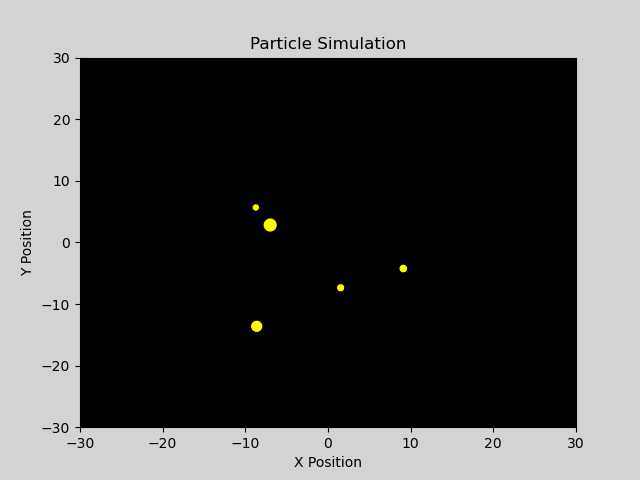

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Class for defining the body
class Body:
    def __init__(self, mass, position, velocity):
        self.mass = mass  # Mass of body [kg]
        self.position = np.array(position)  # Position of body [m]
        self.velocity = np.array(velocity)  # Velocity of body [m/s]
        self.radius = np.cbrt(self.mass / (4/3 * np.pi)) * 1e2  # Estimate radius from mass

# Initialize bodies with random properties
def initialize_bodies(num_bodies, mass_range, position_range, velocity_range):
    masses = np.random.uniform(mass_range[0], mass_range[1], num_bodies)
    positions = np.random.uniform(position_range[0], position_range[1], (num_bodies, 2))
    velocities = np.random.uniform(velocity_range[0], velocity_range[1], (num_bodies, 2))

    return [Body(masses[i], positions[i], velocities[i]) for i in range(num_bodies)]

# Inelastic collision detection and response (perfectly inelastic)
def resolve_collision(body1, body2):
    # Calculate the vector between the two bodies
    r12 = body2.position - body1.position
    distance = np.linalg.norm(r12)
    
    # If bodies are close enough (based on their radii), they collide
    if distance < body1.radius + body2.radius:
        # Unit vector in the direction of the collision normal
        normal = r12 / distance
        
        # Relative velocity
        v_rel = body1.velocity - body2.velocity
        
        # Velocity along the normal direction (projection of relative velocity onto the collision normal)
        v_rel_normal = np.dot(v_rel, normal)

        # Only handle the collision if the bodies are moving toward each other
        if v_rel_normal < 0:
            # Momentum conservation in an inelastic collision (they stick together)
            m1 = body1.mass
            m2 = body2.mass

            # Calculate the common velocity after collision
            v_final = (m1 * body1.velocity + m2 * body2.velocity) / (m1 + m2)

            # After collision, both bodies have the same velocity (they stick together)
            body1.velocity = v_final
            body2.velocity = v_final

            # After the collision, treat them as a single combined body (optional)
            body1.mass = m1 + m2  # Combined mass
            body2.mass = 0  # Body 2 is effectively absorbed into body 1

# Time step for position updates
dt = 0.1

# Number of bodies and initial properties
num_bodies = 5
mass_range = [1e1, 1e3]  # Masses between 10 and 1000 kg
position_range = [-15, 15]  # Positions between -15 and 15 meters
velocity_range = [-2, 2]  # Velocities between -2 and 2 m/s

# Initialize the bodies
bodies = initialize_bodies(num_bodies, mass_range, position_range, velocity_range)

# Set up the plot
fig, ax = plt.subplots()
ax.set_xlim(-30, 30)  # X-axis limits
ax.set_ylim(-30, 30)  # Y-axis limits
ax.set_title("Particle Simulation", color="black")  # Title
ax.set_xlabel("X Position", color="black")  # X-axis label
ax.set_ylabel("Y Position", color="black")  # Y-axis label
ax.tick_params(axis='x', colors="black")  # X-axis ticks
ax.tick_params(axis='y', colors="black")  # Y-axis ticks
ax.set_facecolor("black")  # Set background color
fig.patch.set_facecolor("lightgray")  # Outside the plot

# Create scatter plot with initial positions
scat = ax.scatter(
    [body.position[0] for body in bodies],  # Initial x-coordinate of bodies
    [body.position[1] for body in bodies],  # Initial y-coordinate of bodies
    s=[body.mass * 0.1 for body in bodies],  # Size of bodies proportional to mass
    c="yellow",  # Color of bodies
)

# Update function for animation
def update_position(frame):
    updated_positions = []  # Initialize as a list

    # Update the position and check for collisions
    for body in bodies:
        body.position += body.velocity * dt  # Update positions
        updated_positions.append(body.position)  # Collect new positions
    
    # Handle collisions between each pair of bodies
    for i in range(len(bodies)):
        for j in range(i + 1, len(bodies)):
            resolve_collision(bodies[i], bodies[j])

    # Update scatter plot with new positions
    scat.set_offsets(updated_positions)
    
    # Remove any "absorbed" bodies (i.e., those that have mass=0)
    non_absorbed_bodies = [body for body in bodies if body.mass > 0]
    scat.set_offsets([body.position for body in non_absorbed_bodies])
    
    return scat

# Create the animation
ani = animation.FuncAnimation(
    fig=fig,
    func=update_position,
    frames=range(100),  # Number of frames
    interval=50,  # Time between frames in milliseconds
    repeat=False,  # Stop after the last frame
)

# Show the plot
plt.show()


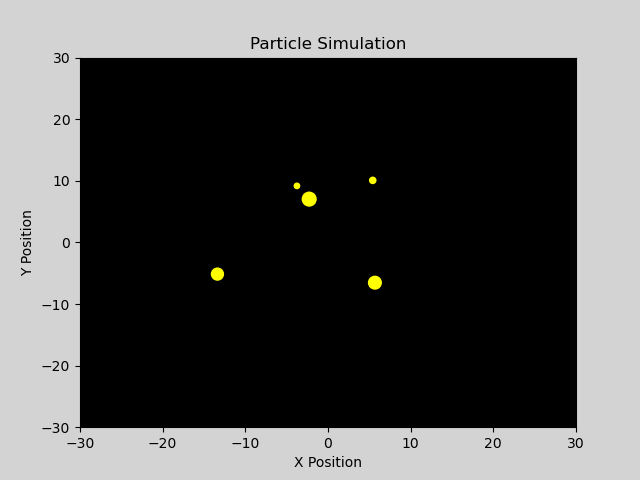

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Class for defining the body
class Body:
    def __init__(self, mass, position, velocity):
        self.mass = mass  # Mass of body [kg]
        self.position = np.array(position)  # Position of body [m]
        self.velocity = np.array(velocity)  # Velocity of body [m/s]
        self.radius = np.cbrt(self.mass / (4/3 * np.pi)) * 1e2  # Estimate radius from mass

# Initialize bodies with random properties
def initialize_bodies(num_bodies, mass_range, position_range, velocity_range):
    masses = np.random.uniform(mass_range[0], mass_range[1], num_bodies)
    positions = np.random.uniform(position_range[0], position_range[1], (num_bodies, 2))
    velocities = np.random.uniform(velocity_range[0], velocity_range[1], (num_bodies, 2))

    return [Body(masses[i], positions[i], velocities[i]) for i in range(num_bodies)]

# Inelastic collision detection and response (elastic, but bodies don't merge)
def resolve_collision(body1, body2):
    # Calculate the vector between the two bodies
    r12 = body2.position - body1.position
    distance = np.linalg.norm(r12)
    
    # If bodies are close enough (based on their radii), they collide
    if distance < body1.radius + body2.radius:
        # Unit vector in the direction of the collision normal
        normal = r12 / distance
        
        # Relative velocity
        v_rel = body1.velocity - body2.velocity
        
        # Velocity along the normal direction (projection of relative velocity onto the collision normal)
        v_rel_normal = np.dot(v_rel, normal)

        # Only handle the collision if the bodies are moving toward each other
        if v_rel_normal < 0:
            # Inelastic collision: no perfect bouncing, but momentum is still conserved
            m1 = body1.mass
            m2 = body2.mass

            # Calculate the new velocities after an inelastic collision (loss of kinetic energy)
            v1_new = body1.velocity - (2 * m2 / (m1 + m2)) * v_rel_normal * normal
            v2_new = body2.velocity - (2 * m1 / (m1 + m2)) * (-v_rel_normal) * normal

            # Apply the new velocities
            body1.velocity = v1_new * 0.9  # 10% energy loss per collision
            body2.velocity = v2_new * 0.9  # 10% energy loss per collision

# Time step for position updates
dt = 0.1

# Number of bodies and initial properties
num_bodies = 5
mass_range = [1e1, 1e3]  # Masses between 10 and 1000 kg
position_range = [-15, 15]  # Positions between -15 and 15 meters
velocity_range = [-2, 2]  # Velocities between -2 and 2 m/s

# Initialize the bodies
bodies = initialize_bodies(num_bodies, mass_range, position_range, velocity_range)

# Set up the plot
fig, ax = plt.subplots()
ax.set_xlim(-30, 30)  # X-axis limits
ax.set_ylim(-30, 30)  # Y-axis limits
ax.set_title("Particle Simulation", color="black")  # Title
ax.set_xlabel("X Position", color="black")  # X-axis label
ax.set_ylabel("Y Position", color="black")  # Y-axis label
ax.tick_params(axis='x', colors="black")  # X-axis ticks
ax.tick_params(axis='y', colors="black")  # Y-axis ticks
ax.set_facecolor("black")  # Set background color
fig.patch.set_facecolor("lightgray")  # Outside the plot

# Create scatter plot with initial positions
scat = ax.scatter(
    [body.position[0] for body in bodies],  # Initial x-coordinate of bodies
    [body.position[1] for body in bodies],  # Initial y-coordinate of bodies
    s=[body.mass * 0.1 for body in bodies],  # Size of bodies proportional to mass
    c="yellow",  # Color of bodies
)

# Update function for animation
def update_position(frame):
    updated_positions = []  # Initialize as a list

    # Update the position and check for collisions
    for body in bodies:
        body.position += body.velocity * dt  # Update positions
        updated_positions.append(body.position)  # Collect new positions
    
    # Handle collisions between each pair of bodies
    for i in range(len(bodies)):
        for j in range(i + 1, len(bodies)):
            resolve_collision(bodies[i], bodies[j])

    # Update scatter plot with new positions
    scat.set_offsets(updated_positions)
    
    return scat

# Create the animation
ani = animation.FuncAnimation(
    fig=fig,
    func=update_position,
    frames=range(100),  # Number of frames
    interval=50,  # Time between frames in milliseconds
    repeat=False,  # Stop after the last frame
)

# Show the plot
plt.show()
